# Analysis of individual track data.

In [1]:
import shapely as sp
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import ICESat2GroundingLineMigration.IceSatHDF5Unpacker as unpack
pd.options.mode.chained_assignment = None

/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


## Gather data

Opens track dataframe (`data_path`) and study area polygon (`study_area_path`)

In [2]:
data_path = "RAW-Bungen2021-01.json"
study_area_path = "Bounds/bungen.gpkg"
proj4_crs = "+proj=stere +lat_0=-90 +lat_ts=-71 +lon_0=0 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs"

In [3]:
data = gpd.read_file(f"Saves/{data_path}")
study_area = gpd.read_file(study_area_path)
study_area = study_area.to_crs(proj4_crs)

**Capture bounds**

In [4]:
bounds = study_area["geometry"].total_bounds
xlim, ylim = (bounds[0], bounds[2]), (bounds[1], bounds[3])

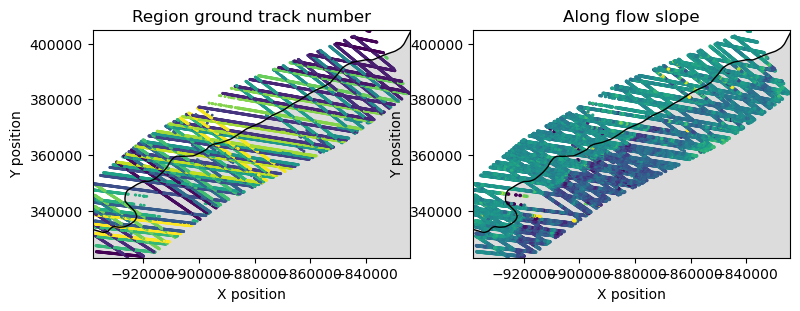

In [5]:
basemap = unpack.Basemap("BackgroundData/GroundedIce.gpkg")

fig, ax = plt.subplots(1, 2, sharex = True, figsize=(9, 4))

basemap.basemap_gpd.plot(ax=ax[0], color="gainsboro", edgecolor="none")
data.plot(ax=ax[0], edgecolor = None, column="rgt", markersize=1, aspect=1)
basemap.basemap_gpd.plot(ax=ax[0], color="none", edgecolor="black")

basemap.basemap_gpd.plot(ax=ax[1], color="gainsboro", edgecolor="none")
data.plot(ax=ax[1], edgecolor = None, column="slope", vmin=-0.01, vmax=0.01, markersize=2, aspect=1)
basemap.basemap_gpd.plot(ax=ax[1], color="none", edgecolor="black")

ax[0].set_ylim(ylim[0], ylim[1])
ax[0].set_xlim(xlim[0], xlim[1])
ax[1].set_ylim(ylim[0], ylim[1])
ax[1].set_xlim(xlim[0], xlim[1])

ax[0].set_title("Region ground track number")
ax[1].set_title("Along flow slope")

ax[0].set_xlabel("X position")
ax[0].set_ylabel("Y position")
ax[1].set_xlabel("X position")
ax[1].set_ylabel("Y position")

plt.show()

## List RGT numbers

In [6]:
unique_rgt = np.unique(np.array(data["rgt"]))
print(unique_rgt)

[  19.   34.   56.   95.  132.  156.  178.  193.  217.  278.  315.  339.
  376.  400.  437.  498.  620.  635.  659.  696.  720.  757.  781.  842.
  879.  903.  940. 1016. 1040. 1062. 1101. 1162. 1223. 1321. 1345.]


## Visualize Track

In [7]:
single_rgt = data[data["rgt"] == 1321]
single_beam = single_rgt[single_rgt["name"] == "gt3r"]

In [8]:
single_beam

,slope,angle,azumith_in_xy,dh_fit_dx,dh_fit_dy,date_time,quality,along_track_dist,name,rgt,geometry
12488,-0.005682,-0.173659,-0.626441,-0.007719,0.003127,1.014797e+08,0,76.937321,gt3r,1321.0,POINT (-875836.85313 350768.94724)
12490,-0.005453,-0.173659,-0.627166,-0.006879,0.002381,1.014797e+08,0,76.742636,gt3r,1321.0,POINT (-875994.48846 350883.19867)
12492,-0.005501,-0.169278,-0.627862,-0.007063,0.002680,1.014797e+08,0,76.547950,gt3r,1321.0,POINT (-876152.04466 350997.56018)
12508,-0.003499,-0.187124,-0.628289,-0.007274,0.002798,1.014797e+08,0,75.769202,gt3r,1321.0,POINT (-876782.80025 351454.28118)
12510,-0.002868,-0.187124,-0.625994,-0.004929,0.002289,1.014797e+08,0,75.574514,gt3r,1321.0,POINT (-876940.57174 351568.34937)
...,...,...,...,...,...,...,...,...,...,...,...
25767,-0.001047,-0.066386,-0.629969,-0.000083,-0.000529,1.014797e+08,0,39.549220,gt3r,1321.0,POINT (-906105.89130 372715.47083)
25771,-0.001283,-0.066386,-0.625404,0.001228,-0.000371,1.014797e+08,0,39.354445,gt3r,1321.0,POINT (-906263.80072 372829.49697)
25773,-0.001617,-0.057518,-0.626938,-0.001535,-0.000512,1.014797e+08,0,39.159669,gt3r,1321.0,POINT (-906421.53511 372943.76524)
25775,-0.001803,-0.100124,-0.627360,-0.001599,0.000242,1.014797e+08,0,38.964894,gt3r,1321.0,POINT (-906579.22152 373058.10036)


## Compute along track distance

In [9]:
ys = []
xs = []
for index, row in single_beam.iterrows():
    x, y = row["geometry"].xy
    xs.append(x[0])
    ys.append(y[0])
single_beam["y"] = ys
single_beam["x"] = xs
single_beam = single_beam.set_index("date_time")
single_beam.sort_index(inplace=True)

In [10]:
distances = []
i = 0
for index, row in single_beam.iterrows():
    if len(distances) == 0:
        distances.append(0)
    else:
        x_1, y_1 = single_beam["geometry"].iloc[i-1].xy
        x_1, y_1 = x_1[0], y_1[0]
        x_2, y_2 = row["geometry"].xy
        x_2, y_2 = x_2[0], y_2[0]
        dist = ((x_2 - x_1)**2 + (y_2 - y_1)**2)**0.5
        distances.append(dist + distances[-1])
    i += 1
single_beam["dist"] = distances

print("-Distance Check-")
print(f"Estimated Dist: {distances[-1]} m")

x_1, y_1 = single_beam["geometry"].iloc[0].xy
x_1, y_1 = x_1[0], y_1[0]
x_2, y_2 = single_beam["geometry"].iloc[-1].xy
x_2, y_2 = x_2[0], y_2[0]

print(f"Rough Dist: {((x_2 - x_1)**2 + (y_2 - y_1)**2)**0.5} m")

single_beam["dist"] = single_beam["dist"] / 1000

-Distance Check-
Estimated Dist: 38167.20287372935 m
Rough Dist: 38167.12856578857 m


## Find intersect w/ gline

### Step 1: Turn grounding line into simple dataframe

In [11]:
xsize, ysize = int((xlim[1] - xlim[0]) / 450), int((ylim[1] - ylim[0]) / 450)

gline_clip = basemap.basemap_gpd.clip_by_rect(xlim[0], ylim[0], xlim[1], ylim[1])
gline_poly = gline_clip.iloc[0]

x, y = gline_poly.exterior.coords.xy
x, y = np.array(x.tolist()), np.array(y.tolist())

x = np.delete(x, [0, -1, -2]) # removes lines on the border of the clipped region
y = np.delete(y, [0, -1, -2])

gline_xy = pd.DataFrame({"x":x,"y":y})

### Step 2: Hunt for intersection

In [12]:
track_maxx, track_minx = single_beam["x"].max(), single_beam["x"].min()
track_maxy, track_miny = single_beam["y"].max(), single_beam["y"].min()
gline_xy = gline_xy[(gline_xy["x"] < track_maxx) & (gline_xy["x"] > track_minx)]
gline_xy = gline_xy[(gline_xy["y"] < track_maxy) & (gline_xy["y"] > track_miny)]
gline_np = np.vstack((np.array(gline_xy["x"]), np.array(gline_xy["y"]))).T

In [13]:
gline = sp.geometry.LineString(gline_np)
track_np = np.vstack((single_beam["x"], single_beam["y"]))
track = sp.geometry.LineString(track_np.T)

x_int, y_int = gline.intersection(track).xy
x_int, y_int = x_int[0], y_int[0]
print(f"Found intersection at: {x_int},{y_int}")

track_np = track_np.T


Found intersection at: -894067.8485295917,363982.8351367457


In [14]:
direc_x, direc_y = [], []

i = 0
while i < len(track_np) - 1:
    if track_np[i, 0] < track_np[i+1, 0]:
        direc_x.append(1)
    else:
        direc_x.append(-1)
    if track_np[i, 1] < track_np[i + 1, 1]:
        direc_y.append(1)
    else:
        direc_y.append(-1)                
    i += 1

direc_x.append(direc_x[-1])
direc_y.append(direc_y[-1])
    
single_beam["direc_x"] = direc_x
single_beam["direc_y"] = direc_y
    
# get closest point
out = sp.ops.nearest_points(sp.geometry.MultiPoint(track_np), gline)
point, gline_nearest = out
row = single_beam[single_beam["x"] == point.x].iloc[0]

single_beam_clipped = single_beam

if row["direc_x"] == 1:
    single_beam_clipped = single_beam_clipped[single_beam_clipped["x"] < x_int]
else:
    single_beam_clipped = single_beam_clipped[single_beam_clipped["x"] > x_int]
    
if row["direc_y"] == 1:
    single_beam_clipped = single_beam_clipped[single_beam_clipped["y"] < y_int]
else:
    single_beam_clipped = single_beam_clipped[single_beam_clipped["y"] > y_int]

last_point = single_beam_clipped.iloc[-1]

int_dist = (((last_point["x"] - x_int)**2 + (last_point["y"] - y_int)**2)**0.5) / 1000 + row["dist"]
print(f"Along track dist @ intersection {int_dist}")

Along track dist @ intersection 15.651034620917287


In [15]:
# offset the along track distance, to be 0 at the gline.
single_beam["dist"] = single_beam["dist"] - int_dist

### Apply Butterworth filter

In [16]:
import scipy.signal as signal
import scipy.interpolate as interp

def interpolate(dataframe, column):
    function = interp.interp1d(dataframe.index, dataframe[column], kind = "linear")
    dataframe[column] = function(dataframe.index)
    return dataframe

def apply_butter(series, order, cut_off):
    b, a = signal.butter(order, cut_off, btype="lowpass")
    series = signal.filtfilt(b, a, np.array(series))
    return series

In [17]:
# count nans
print(f"Nan sum: {single_beam['slope'].isna().sum()}")

Nan sum: 0


In [18]:
#perform linear interpolation on slope
single_beam = interpolate(single_beam, "slope")

order = 5
cutoff = 0.5
single_beam[f"slope-filt"] = apply_butter(single_beam["slope"], order, cutoff)

## Visualize

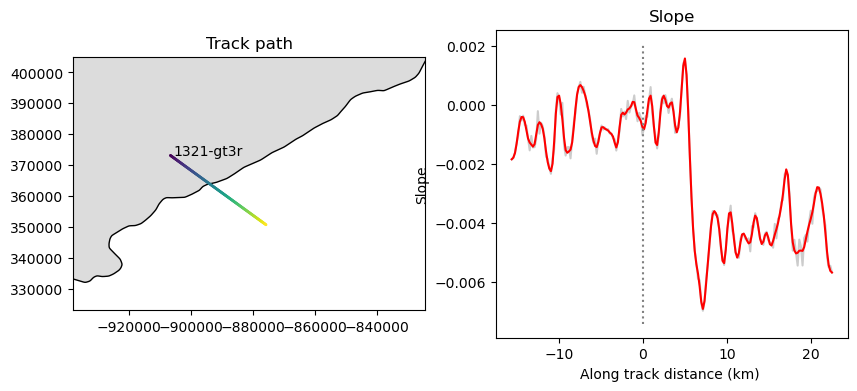

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

single_beam["index"] = single_beam.index

ax[0].set_facecolor("gainsboro")
basemap.basemap_gpd.plot(ax=ax[0], color="white", edgecolor="black")
single_beam.plot(ax=ax[0], column="index", aspect = 1, markersize = 1)
px, py = single_beam["geometry"].iloc[0].xy
x, y = px[0], py[0]
rgt = int(single_beam["rgt"].iloc[0])
name = single_beam["name"].iloc[0]
ax[0].text(x + 1000, y + 100, f"{rgt}-{name}")
ax[0].set_ylim(ylim[0], ylim[1])
ax[0].set_xlim(xlim[0], xlim[1])
ax[0].set_title("Track path")

ax[1].plot(single_beam["dist"],single_beam["slope"], c="black", alpha = 0.2)
ax[1].plot(single_beam["dist"],single_beam["slope-filt"], c="red")
ax[1].vlines(0, ymin=single_beam["slope-filt"].min() - 0.0005, ymax=single_beam["slope-filt"].max() + 0.0005, linestyles = "dotted", color="gray")
ax[1].set_title("Slope")
ax[1].set_xlabel("Along track distance (km) ")
ax[1].set_ylabel("Slope")

plt.show()

## Compute Deriv

In [20]:
def comp_deriv(series, dist):
    derivs = []
    for i in range(len(series) - 1):
        deriv = (series.iloc[i + 1] - series.iloc[i]) / (dist.iloc[i + 1] - dist.iloc[i])
        derivs.append(deriv)
    derivs.append(derivs[-1])
    return np.array(derivs)

In [21]:
single_beam["slope_deriv_1"] = comp_deriv(single_beam["slope"], single_beam["dist"])
order = 5
cutoff = 0.3
single_beam[f"slope_deriv_1-filt"] = apply_butter(single_beam["slope_deriv_1"], order, cutoff)

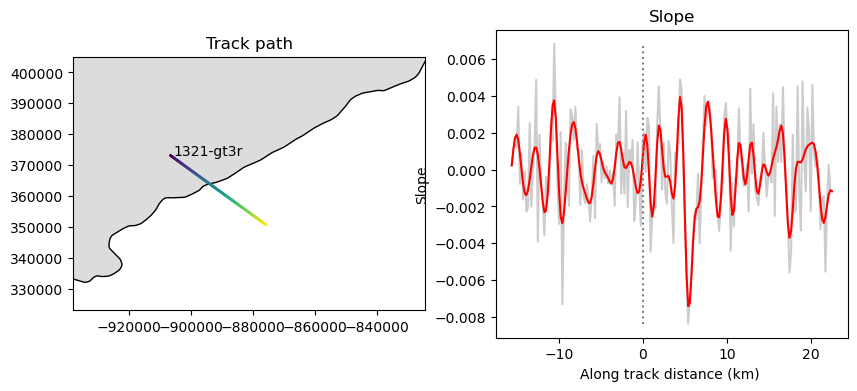

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

single_beam["index"] = single_beam.index

ax[0].set_facecolor("gainsboro")
basemap.basemap_gpd.plot(ax=ax[0], color="white", edgecolor="black")
single_beam.plot(ax=ax[0], column="index", aspect = 1, markersize = 1)
px, py = single_beam["geometry"].iloc[0].xy
x, y = px[0], py[0]
rgt = int(single_beam["rgt"].iloc[0])
name = single_beam["name"].iloc[0]
ax[0].text(x + 1000, y + 100, f"{rgt}-{name}")
ax[0].set_ylim(ylim[0], ylim[1])
ax[0].set_xlim(xlim[0], xlim[1])
ax[0].set_title("Track path")

ax[1].plot(single_beam["dist"],single_beam["slope_deriv_1"], c="black", alpha=0.2)
ax[1].plot(single_beam["dist"],single_beam["slope_deriv_1-filt"], c="red")
ax[1].vlines(0, ymin=single_beam["slope_deriv_1"].min(), ymax=single_beam["slope_deriv_1"].max(), linestyles = "dotted", color="gray")
ax[1].set_title("Slope")
ax[1].set_xlabel("Along track distance (km) ")
ax[1].set_ylabel("Slope")

plt.show()